Part I
---


| Var | Range | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (-2;9) | 110 | 1.25 | 4 | Скотта | t-распределение k = 7 |


In [99]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

import math

n = 110
a = -2
sigma = 9


Task 1


In [100]:
sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
print(sample)

[ -2.58228955  -0.10607427   9.00031245  -2.79694125   0.89318303
  11.80496378  -9.9173255   -2.46126523  -1.02791457  -3.38924829
 -16.3800095   -7.56917062 -21.79907467  -1.78652156  -3.97076363
  -9.79600429  -1.31958605   9.72679157 -12.25856857  11.83804395
 -19.84279754 -10.2687126  -12.16130679 -23.57989717  -0.29137055
  10.76497441  -5.26635281  -9.95417037  -1.11364297  -3.44524031
   5.98244399   9.44549121  -9.64542541   5.76057862   0.13976642
  -7.09107598   1.81216768   4.29770432  15.05044163   6.48045624
   6.32106639   3.62117857 -11.07561347  -6.37213918 -21.19983047
  -1.63250981   3.90217174   8.74794332   1.72253328  -7.26539124
 -11.54780963   6.32839572 -15.73854735 -10.20928259 -15.32552226
   0.6977508   -9.84938871   8.06659896 -10.26488216 -13.54718049
  11.62393434   3.2273589   -4.87562284   5.62582091  -1.74643553
 -11.20217425  15.19528071  -6.37969776  -2.24566932 -18.27955571
  -7.63212341  -7.60769333  -5.53680196   1.52718235 -17.76524692
  11.11527

In [101]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = math.floor(sample.min())
max_smpl = math.ceil(sample.max())
h = (max_smpl-min_smpl)/n_intervals

print(n_intervals, min_smpl, max_smpl, h)


8 -24 16 5.0


In [102]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)


1 interval: -24.0 - -19.0
2 interval: -19.0 - -14.0
3 interval: -14.0 - -9.0
4 interval: -9.0 - -4.0
5 interval: -4.0 - 1.0
6 interval: 1.0 - 6.0
7 interval: 6.0 - 11.0
8 interval: 11.0 - 16.0


In [103]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма относительных частот - {(frequency/n).sum()}')
# frequency = frequency/n
# print(frequency)
frequency = frequency/n



1 interval: 4
2 interval: 8
3 interval: 19
4 interval: 17
5 interval: 24
6 interval: 19
7 interval: 13
8 interval: 6

Сумма относительных частот - 1.0


In [104]:
tmp = frequency/h
for i in range(0, len(tmp)):
    print(f'{i+1} interval: {tmp[i]}')
print(f'Сумма абсолютных частот {tmp.sum()}')
frequency = tmp

1 interval: 0.007272727272727273
2 interval: 0.014545454545454545
3 interval: 0.034545454545454546
4 interval: 0.030909090909090907
5 interval: 0.04363636363636363
6 interval: 0.034545454545454546
7 interval: 0.023636363636363636
8 interval: 0.010909090909090908
Сумма абсолютных частот 0.2


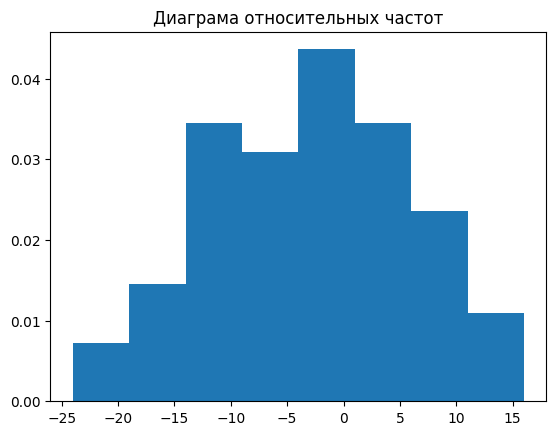

In [105]:
plt.title("Диаграма относительных частот")
plt.stairs(frequency, intervals, fill=True)



Task 2

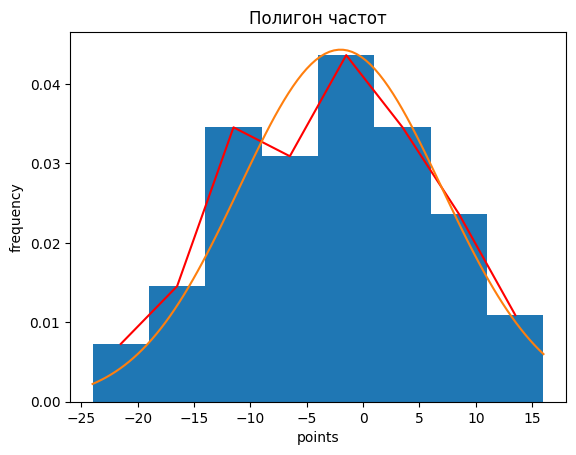

In [108]:
lineY = []
for i in frequency:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)

plt.stairs(frequency, intervals, fill=True)
plt.plot(lineX, lineY, color="red")
import scipy.stats as stats
x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, stats.norm.pdf(x, a, sigma))
plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

Part II
---
